In [ ]:
import torch
import pyro
import pyro.distributions as dist
import matplotlib.pyplot as plt

In [ ]:
# Mixing probabilities
mixing_probs = torch.tensor([0.5, 0.5])
# Component means (2 components, 2D)
means = torch.tensor([[1., 1.],[3., 5.]])
# Identity covariance
cov = torch.eye(2)

In [ ]:
def gmm_model(n_samples):

    with pyro.plate("samples", n_samples):

        # Sample component assignments
        z = pyro.sample("z", dist.Categorical(mixing_probs))

        # Select the mean for each sampled component
        chosen_means = means[z]

        # Sample from the selected Gaussian
        x = pyro.sample("x", dist.MultivariateNormal(chosen_means, cov))

    return x

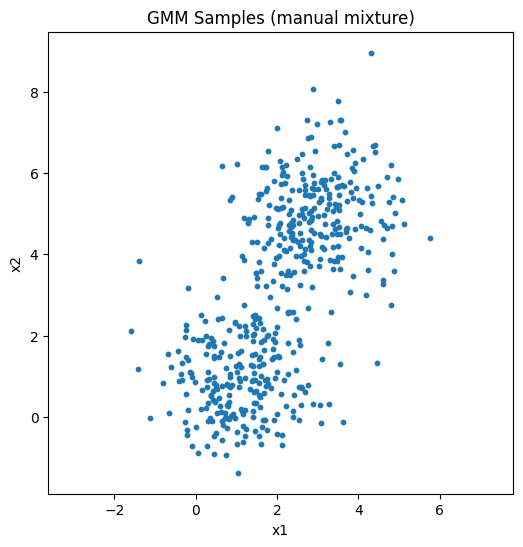

In [ ]:
samples = gmm_model(500).detach()

x1 = samples[:, 0].numpy()
x2 = samples[:, 1].numpy()

plt.figure(figsize=(6, 6))
plt.scatter(x1, x2, s=10)
plt.title("GMM Samples (manual mixture)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()
